In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(path)

In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
df.drop(['id','Unnamed: 0'],axis=1, inplace = True)

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
Floor = df['floors'].value_counts()
Floor.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


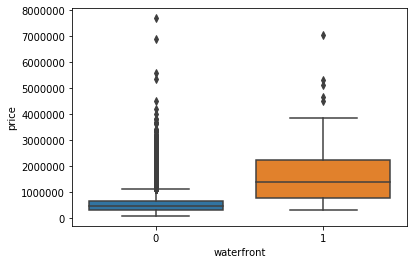

In [12]:
import seaborn as sns
sns.boxplot(x='waterfront',y='price',data = df)

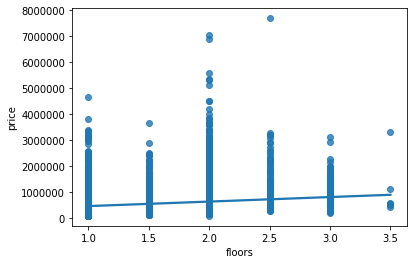

In [13]:
sns.regplot(x='floors',y='price',data = df)

In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['sqft_living']]
y = df[['price']]
lm.fit(x,y)
yhat = lm.predict(x)
print(yhat)
lm.score(x,y)

[[287555.06702451]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]


0.49285321790379316

In [6]:
df['bedrooms'].replace(np.nan,df['bedrooms'].mean(),inplace=True)
df['bathrooms'].replace(np.nan,df['bathrooms'].mean(),inplace=True)

In [7]:
z = df[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
lm.fit(z,y)
yhat = lm.predict(z)
lm.score(z,y)

0.6576952974476575

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('mode',LinearRegression())]
y = df[['price']]
pipe = Pipeline(Input)
pipe.fit(z,y)
yhat = pipe.predict(z)
lm.score(z,y)

0.6576952974476575

In [9]:
lm.coef_

array([[-3.02723153e+04,  6.01055856e+05,  6.73054349e+05,
        -2.60264588e+04, -1.39474945e+14,  6.70770338e+04,
        -3.25165783e+03,  4.43204922e+00, -1.39474945e+14,
         8.20098889e+04,  1.39474945e+14]])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
z_train,z_test,y_train,y_test = train_test_split(z,y,test_size=0.20,random_state = 1)
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(z_train,y_train)
lm.score(z_test,y_test)

0.6494438701260206

In [33]:
pr = PolynomialFeatures(degree=2)
z_train_pr = pr.fit_transform(z_train[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
z_test_pr = pr.fit_transform(z_test[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(z_train,y_train)
lm.score(z_test,y_test)

0.6494438701260206